1. <span style="color: #ffd33d">os.chdir</span> : 디렉토리 위치 변경 (가상으로 위치를 선정해준 느낌)  
2. <span style="color: #ffd33d">matplotlib.image.imread</span> : 이미지를 다차원 NumPy 배열(Red, Green, Blue)로 로딩  
3. <span style="color: #ffd33d">Pillow</span> 패키지가 설치되어 있어야 [.png] 파일 이외의 이미지를 읽어올 수 있음
- i) <span style="color: #ffd33d">mpimg.imread('파일명')</span> : numpy 배열(R,G,B)로 나타내기
- ii) <span style="color: #ffd33d">plt.imshow()</span> : 그림으로 나타내기  

4. <span style="color: #ffd33d">plt.axis('off')</span>  # 축이 표시되지 않음  

5. <span style="color: #ffd33d">cv2.cvtColor(소스값, 옵션값, dst, dstCn)</span>  
- 파이썬의 openCV의 imread 읽은 이미지(image)파일은 BGR(Blue, Green, Red) 형태로 읽음  
```
    - Gray
    - HSV (Hue, Saturation, Value)
    - RGB (Red, Green, Blue)
    - LAB (Lightness, Green to Maenta, Blue to Yellow)  
```

  
- 색상 공간 변화는 cvtColor 함수의 옵션(option) 값에서 변경 가능  

- 소스값은 imread로 읽은 값을 넣으면 되고 옵션값은 색을 변환하기 위해 사용  
```
    - cv2.COLOR_BGR2GRAY  :  색을 회색으로 반전
    - cv2.COLOR_BGR2HSV   :  지배적인 파장의 색상을 강조하는 형태로 변형
    - cv2.COLOR_BGR2RGB   :  BGR(Blue, Green, Red) 구성을 RGB(Red, Green, Blue)로 반전
    - cv2.COLOR_BGR2LAB   :  밝기(Lightness)를 강조하고 녹색(Green)을 Magneta로 파랑색(Blue)을 노랑색(Yellow)으로 반전
 ```

- dst는 출력 이미지의 사이즈(Size)와 깊이(Depth)를 원본 이미지에 맞춤  

- dstCn은 출력 이미지의 채널 수
 


---

In [14]:
import os
os.getcwd() # 디렉터리 위치 리턴
os.chdir("C:/Users/USER/Desktop/data/img") # 디렉터리 위치 변경

In [15]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('SHJ_1.png')
# print(img)
# RGB배열로 나타난 것 (3차원)

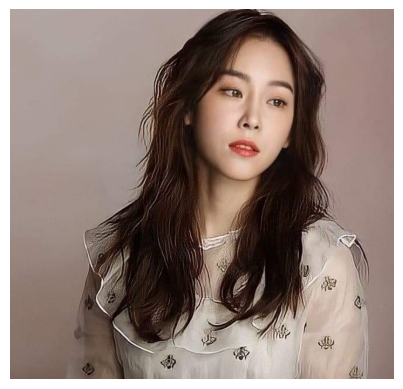

In [16]:
plt.imshow(img)
plt.axis('off')  # 축이 표시되지 않음
plt.show()

In [17]:
# OpenCV와 matplotlib을 함께 사용
import cv2
 
img1 = cv2.imread('SHJ_4.jpg')
# print(img1)
# RGB배열로 나타난 것 (3차원)

In [18]:
# 한글 깨짐 방지
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')

# 음수 처리
plt.rcParams['axes.unicode_minus'] = False

In [21]:
img_44 = cv2.cvtColor(img_4, cv2.COLOR_BGR2RGB)

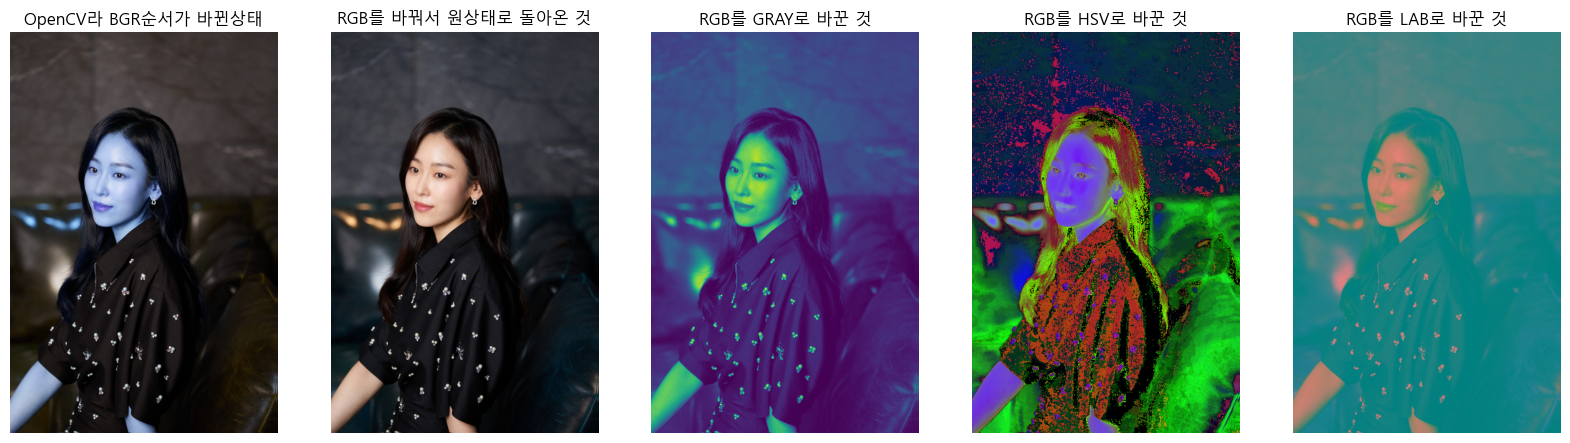

In [24]:
# OpenCV도 다차원 NumPy 배열로 RGB 영상을 표현하지만, 순서가 반대!!
# => BGR을 RGB로 순서 변경하고, 그래프를 그리면 결과는 맷플롯립과 동일해짐.

img_4 = cv2.imread('SHJ_4.jpg')

############################################################################
# 단일 플롯에 두 개의 이미지 그리기. 맷플롯립은 플롯을 rows*cols 행렬로 설정
# + 상단이 제목 추가
fig = plt.figure(figsize=(20,10))               # 플롯 사이즈 설정
rows = 1
cols = 5

ax1 = fig.add_subplot(rows, cols, 1)
ax1.imshow(img_4)
ax1.set_title('OpenCV라 BGR순서가 바뀐상태')     # 제목 추가
ax1.axis("off")                                 # 축 제거
 
ax2 = fig.add_subplot(rows, cols, 2)
ax2.imshow(cv2.cvtColor(img_4, cv2.COLOR_BGR2RGB))
ax2.set_title('RGB를 바꿔서 원상태로 돌아온 것')
ax2.axis("off")

ax3 = fig.add_subplot(rows, cols, 3)
ax3.imshow(cv2.cvtColor(img_44, cv2.COLOR_BGR2GRAY))
ax3.set_title('RGB를 GRAY로 바꾼 것')
ax3.axis("off")

ax4 = fig.add_subplot(rows, cols, 4)
ax4.imshow(cv2.cvtColor(img_44, cv2.COLOR_BGR2HSV))
ax4.set_title('RGB를 HSV로 바꾼 것')
ax4.axis("off")

ax5 = fig.add_subplot(rows, cols, 5)
ax5.imshow(cv2.cvtColor(img_44, cv2.COLOR_BGR2LAB))
ax5.set_title('RGB를 LAB로 바꾼 것')
ax5.axis("off")
 
plt.tight_layout
plt.show()
############################################################################

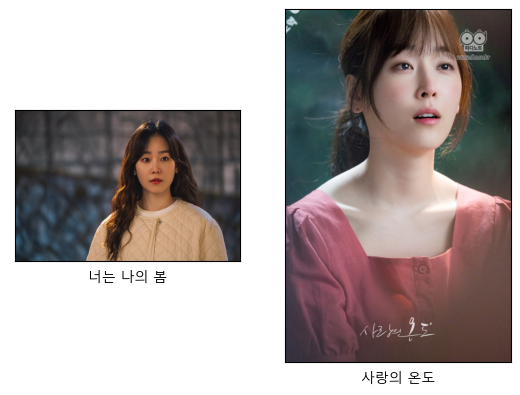

In [ ]:
# + 하단에 제목 추가
fig = plt.figure()
rows = 1
cols = 2

img_3 = cv2.imread('SHJ_3.jpg')
img_5 = cv2.imread('SHJ_5.jpg')

ax1 = fig.add_subplot(rows, cols, 1)
ax1.imshow(cv2.cvtColor(img_3, cv2.COLOR_BGR2RGB))
ax1.set_xlabel('너는 나의 봄')
ax1.set_xticks([]), ax1.set_yticks([])
 
ax2 = fig.add_subplot(rows, cols, 2)
ax2.imshow(cv2.cvtColor(img_5, cv2.COLOR_BGR2RGB))
ax2.set_xlabel('사랑의 온도')
ax2.set_xticks([]), ax2.set_yticks([])

plt.show()


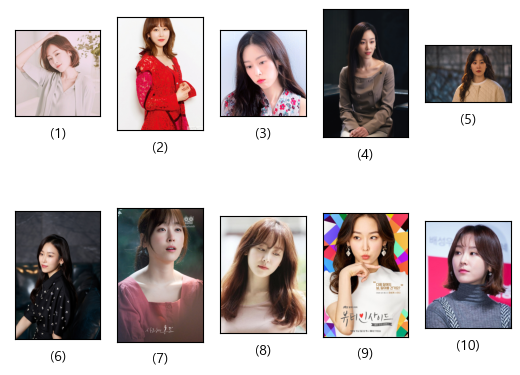

In [ ]:
# 반복문을 이용하여 폴더 내 이미지를 모두 검색하고, 이것을 rows*cols 행렬에 순차적으로 배치
# 그림 제목은 xlabels라는 리스트를 생성하여 작성했고, 이미지 검색은 glob 모듈 기능을 이용

import glob
 
fig = plt.figure() # rows*cols 행렬의 i번째 subplot 생성
rows = 2
cols = 5
i = 1

# ""를 입력해주어야 (1)부터 들어가는 듯. OpenCV가 1부터 읽는 듯
xlabels = ["", "(1)", "(2)", "(3)", "(4)", "(5)", "(6)", "(7)", "(8)", "(9)", "(10)"]
 
for filename in glob.glob("*.jpg"):
    img = cv2.imread(filename)
    ax = fig.add_subplot(rows, cols, i)
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax.set_xlabel(xlabels[i])
    ax.set_xticks([]), ax.set_yticks([])
    i += 1
 
plt.show()
